In [4]:
import numpy as np
import pandas as pd
import warnings; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

In [5]:
import lib.clean_helper as cl

## Looking at Data and Data Preparation
My first step is to always look at some basic descriptors of the dataset, make sure the data loaded correctly, and format the data as necessary. 
After determining how I want my dataset to be formatted, I will make those formats in an python file that I will load in each notebook. Rather than load the raw dataset, I will load my python file.

### Loading Data

In [6]:
orig_train_df = pd.read_csv('../data/kaggle_train.csv', index_col='Id')
train_df = orig_train_df.copy()

### Getting Basic Descriptors of Dataset 
I always start by making sure the loaded data matches the data description and get a general idea of the dataset in the process

#### Looking at Dimensions of Dataframe
The dataframe has 81 columns which matches the dataset description. According to the data description, the dataset includes 79 explanatory variables. This does not conflict with the loaded dataset because one column, `Id` does not contain an explanatory variable, and `SalePrice` is the target not an explantory variable.  

For reference, the description can be found in the doc directory of this repository.

In [7]:
dimensions = train_df.shape; print(dimensions)

(1460, 80)


In [8]:
train_df.head(3)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   

   LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
Id                                    ...                             
1          Lvl    AllPub    Inside    ...            0    NaN   NaN   
2          Lvl    AllPub       FR2    ...            0    NaN   NaN   
3          Lvl    AllPub    Inside    ...            0    NaN   NaN   

   MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                                         
1          NaN       0      2    2008        WD         Normal     208500  
2          NaN       0      5    2007        WD         Normal     181500  
3          NaN       0      9    2008        WD         Normal     223500  

[3 rows x 80 columns]

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

### Data Preparation

##### Binning Years And Making Them Ordinal Categorical Features

In [10]:
# def bin_yrs(yr_col):
#     bins = list(range(1800, 2011, 10))
#     no_bin_nones = yr_col.isin(['none']) == False
#     binned_col = pd.cut(yr_col[no_bin_nones], bins)
#     binned_col = binned_col.cat.add_categories('none')
    
#     return binned_col

yr_feat = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
for y in yr_feat:
    train_df['bin_' + y] = cl.bin_yrs(train_df[y])

In [11]:
cols_to_not_fit = yr_feat

#### Renaming `3SsnPorch` to `ThreeSsnPorch`
It is easier to work with a column whose name does not start with an number character

In [12]:
train_df = train_df.rename(columns={ '3SsnPorch': 'ThreeSsnPorch'})

#### Classifying Numerical and Categorical Features

In [13]:
train_df.dtypes

MSSubClass             int64
MSZoning              object
LotFrontage          float64
LotArea                int64
Street                object
Alley                 object
LotShape              object
LandContour           object
Utilities             object
LotConfig             object
LandSlope             object
Neighborhood          object
Condition1            object
Condition2            object
BldgType              object
HouseStyle            object
OverallQual            int64
OverallCond            int64
YearBuilt              int64
YearRemodAdd           int64
RoofStyle             object
RoofMatl              object
Exterior1st           object
Exterior2nd           object
MasVnrType            object
MasVnrArea           float64
ExterQual             object
ExterCond             object
Foundation            object
BsmtQual              object
                      ...   
TotRmsAbvGrd           int64
Functional            object
Fireplaces             int64
FireplaceQu   

#### Ordinal Categorical Features
The following features are ordinal, but that does not necessarily mean they should be numerical. There are two reasons why I am making the following ordinal features categorical.  
1. We cannot say with certainty that the difference between two consecutive values of these ordinal features is not the same as the difference between between two other consecutive values. Take OverallQual for example. It would be reasonable to say that the difference between a house with "OverallQual 4 Below Average" (data description) and a house with "OverallQual 5 Average" is not the same as the difference between a house with OverallQual being very excellent and a house with OverallQual being excellent. We would say there is diminishing returns.  

2. We could scale the values to reflect the true relationship, but that will likely introduce a lot of error. It is better to not use the ordinality of these features than to use it incorrectly. 

>OverallQual (Ordinal): Rates the overall material and finish of the house
>
>       10	Very Excellent
>       9	Excellent
>       8	Very Good
>       7	Good
>       6	Above Average
>       5	Average
>       4	Below Average
>       3	Fair
>       2	Poor
>       1	Very Poor

In [14]:
ordinal_f = ['MSSubClass' ,'OverallQual',
             'OverallCond',
             'FullBath','HalfBath',
             'BedroomAbvGr','KitchenAbvGr',
             'TotRmsAbvGrd','Fireplaces',
             'MoSold', 'BsmtCond', 'BsmtQual',
             'ExterCond', 'ExterQual',
             'GarageQual', 'GarageCond',
             'HeatingQC', 'KitchenQual',
             'PoolQC']

In [15]:
train_df[ordinal_f] = train_df[ordinal_f].apply(cl.obj_to_ordinal)

#### Cleaning `Exterior2nd`

From data description:

>Exterior2nd: Exterior covering on house (if more than one material)
>
>       AsbShng	Asbestos Shingles
>       AsphShn	Asphalt Shingles
>       BrkComm	Brick Common
>       BrkFace	Brick Face
>       CBlock	Cinder Block
>       CemntBd	Cement Board
>       HdBoard	Hard Board
>       ImStucc	Imitation Stucco
>       MetalSd	Metal Siding
>       Other	Other
>       Plywood	Plywood
>       PreCast	PreCast
>       Stone	Stone
>       Stucco	Stucco
>       VinylSd	Vinyl Siding
>       Wd Sdng	Wood Siding
>       WdShing	Wood Shingles


In [16]:
train_df.Exterior2nd.drop_duplicates().sort_values()

Id
70      AsbShng
299     AsphShn
196     Brk Cmn
31      BrkFace
1371     CBlock
24      CmentBd
8       HdBoard
275     ImStucc
2       MetalSd
596       Other
13      Plywood
530       Stone
64       Stucco
1       VinylSd
16      Wd Sdng
4       Wd Shng
Name: Exterior2nd, dtype: object

```
def clean_ext_typos(ext_col):
    ext_col[ext_col == 'Brk Cmn'] = 'BrkComm'
    ext_col[ext_col == 'Wd Shng'] = 'WdShing'
    ext_col[ext_col == 'CmentBd'] = 'CemntBd'
    
    return ext_col
```

In [17]:
train_df.Exterior2nd = cl.clean_ext_typos(train_df.Exterior2nd)

### Exploratory Data Analysis: Charts of Features v Target Variable

In [18]:
is_dtype_num = train_df.dtypes.isin([np.dtype('float64'), np.dtype('int64')])
num_feats = train_df.dtypes.index[is_dtype_num]

#### Scatter Plots of Numerical Features v `SalePrice`

In [19]:
fig = plt.figure(figsize=(10,60))
for i, col in enumerate([f for f in num_feats if not f == 'SalePrice']):
    fig.add_subplot(20,3,i+1)
    sns.regplot(col, 
                train_df['SalePrice'],
                data=train_df,
                scatter_kws={'alpha': 0.2}
               )
fig.tight_layout()

### Nans that Add Information
Nan values are difficult to work with programmatically.The data description lists the following features as having nan value that add information unlike nans that mean a data point is unknown or missing. Those features describe physical structures that may not exist in a home. For example, a nan value in PoolQC means there is no pool. It stands to reason that if PoolQC is nan, then PoolArea should be nan or zero. Let's replace nan values in columns with strings such as 'none' or the number zero. 


- Alley
- BsmtQual 
- BsmtCond 
- BsmtExposure
- BsmtFinType1
- BsmtFinSF1 
- BsmtFinType2
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- BsmtFullBath
- BsmtHalfBath
- FireplaceQu  
- GarageType  
- GarageYrBlt  
- GarageFinish  
- GarageCars
- GarageArea 
- GarageQual 
- GarageCond 
- PoolArea
- PoolQC 
- Fence 
- MiscFeature

In [20]:
def check_nans(name_of_feats):
    df = train_df[name_of_feats].copy()
    for n in name_of_feats:
        print(df[n].unique())
    if len(name_of_feats) > 2:
        for name in name_of_feats:
            mask = df.isnull().any(axis = 1)
            rows_w_nans_unique = df[mask].drop_duplicates()
        display('unique combination of column values for columns with nans')
        display(rows_w_nans_unique)
            
    elif len(name_of_feats) == 2:
        for n in name_of_feats:
            feat_is_numeric = (df[n].dtype == np.float64) or (df[n].dtype == np.int64)
            if feat_is_numeric:
                is_0 = df[n] == 0
                is__null = df[n].isnull() == False
                is_more_than_0 = df[n] > 0
                
                df[n] = df[n].astype('object')
                df[n] = df[n].fillna('nan')
                df[n][is_0] = 'zero'
                df[n][is_more_than_0] = 'not_0'
    
            else:
                df[n] = df[n].astype('object')
                df[n] = df[n].fillna('nan')
                
        display(pd.crosstab(index = df[name_of_feats[0]], 
                            columns = df[name_of_feats[1]]))
        
        display(pd.crosstab(index = df[name_of_feats[0]], 
                                columns = df[name_of_feats[1]], normalize = 'index'))
        

### Replacing Nans with String 'none'

In [21]:
train_df = cl.nan_to_str_none(train_df)

## Imputing Nans
Dealing with nans that imply that we do not know a value.

In [22]:
is_there_nan = train_df.isnull().sum() != 0
train_df.isnull().sum()[is_there_nan]

LotFrontage        259
MasVnrType           8
MasVnrArea           8
BsmtExposure         1
BsmtFinType2         1
Electrical           1
bin_GarageYrBlt     81
dtype: int64

### Few Nans in `Electrical`, `BsmtExposure`, and `BsmtFinType2` Columns
There is only one nan each in  `Electrical`, `BsmtExposure`, and `BsmtFinType2` . This is an anomoly. We will just drop those observations. The dataset contains 1460 observations, so dropping at most three is trivial. 

Electrical (Ordinal): Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [23]:
is_straggler_nan = train_df[['Electrical', 'BsmtExposure', 'BsmtFinType2']].isnull()
to_keep = is_straggler_nan.sum(axis = 1) == 0
train_df = train_df[to_keep]

### Nans in `LotFrontage`
From data description:
>Lot Frontage (Continuous): Linear feet of street connected to property

In real estate, frontage is the width of a lot, measured at the front part of the lot. Every house has lot frontage. That means nans in that column means missing data. 

#### Dealing with Missing Data
At first glance, you would think you can just ignore the missing data and do your normal calculations. We have lot frontage for 1200 of the 1460 observations in the dataset. We can just make do with the average of the 1200 values that we do know. However, just acting as if those unknown values do not exist actually affect our calculations more than not. 

There is no one best way to handle missing data that works in all cases. Generally, one of our goals is to make our missing data be as innocuous as possible. Let's act as if those nan values equal the mean of the known data. 

In [24]:
train_df.LotFrontage.count()

1198

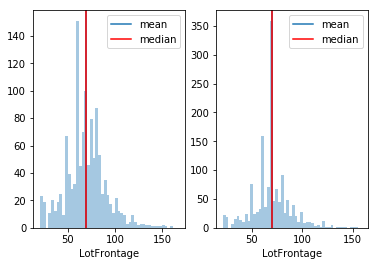

In [25]:
def hist_before_nan_to_mean(feature):
    fig = plt.figure(); fig.add_subplot(1,2,1)
    hist_feat(feature)
    
    dummy = feature.copy()
    mask = dummy.isnull()
    meann = dummy.dropna().mean()
    dummy[mask] = meann
    
    fig.add_subplot(1,2,2)
    hist_feat(dummy)

hist_before_nan_to_mean(train_df.LotFrontage)

meann = train_df.LotFrontage.mean()

In [26]:
train_df.LotFrontage = train_df.LotFrontage.fillna(meann)

### `MasVnrType` and `MasVnrArea`
>MasVnrType: Masonry veneer type
>
>       BrkCmn	Brick Common
>       BrkFace	Brick Face
>       CBlock	Cinder Block
>       None	None
>       Stone	Stone
>	
>MasVnrArea: Masonry veneer area in square feet

There are two houses described as having some type of masonry veneer and masonry veneer areas of zero. That seems to be an error. Because there are only two observations with that error, we will just drop those two rows. 

In [27]:
masonry_veneer = ['MasVnrType', 'MasVnrArea']
check_nans(masonry_veneer)

pd.crosstab(index = train_df['MasVnrType'], columns = train_df['MasVnrArea'])

['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1.420e+02
 2.900e+02 1.270e+02 5.060e+02 2.970e+02       nan 6.040e+02 2.540e+02
 3.600e+01 1.020e+02 4.720e+02 4.810e

MasVnrArea  nan  not_0  zero
MasVnrType                  
BrkCmn        0     15     0
BrkFace       0    442     1
None          0      5   858
Stone         0    127     1
nan           8      0     0

MasVnrArea  nan     not_0      zero
MasVnrType                         
BrkCmn      0.0  1.000000  0.000000
BrkFace     0.0  0.997743  0.002257
None        0.0  0.005794  0.994206
Stone       0.0  0.992188  0.007812
nan         1.0  0.000000  0.000000

MasVnrArea  0.0     1.0     11.0    14.0    16.0    18.0    22.0    24.0    \
MasVnrType                                                                   
BrkCmn           0       0       0       0       0       0       0       0   
BrkFace          1       0       1       1       6       2       1       0   
None           858       2       0       0       0       0       0       0   
Stone            1       0       0       0       1       0       0       1   

MasVnrArea  27.0    28.0     ...    921.0   922.0   975.0   1031.0  1047.0  \
MasVnrType                   ...                                             
BrkCmn           0       0   ...         0       0       0       0       0   
BrkFace          1       1   ...         1       1       1       1       1   
None             0       0   ...         0       0       0       0       0   
Stone            0       0   ...         0       0       0       0       0   

MasVnrArea  1115.0  1129.0  1170.0  1378.0  1600.0  
MasVnrType                                          
BrkCmn           0       0       0       0       0  
BrkFace          1       1       1       1       1  
None             0       0       0       0       0  
Stone            0       0       0       0       0  

[4 rows x 326 columns]

In [28]:
area_0_to_drop = train_df[train_df.MasVnrArea == 0]
stone_to_drop = area_0_to_drop[train_df.MasVnrType == 'Stone'].index.values
brickface_to_drop = area_0_to_drop[train_df.MasVnrType == 'BrkFace'].index.values

train_df = train_df.drop(stone_to_drop)
train_df = train_df.drop(brickface_to_drop)

no_mv = train_df[train_df.MasVnrType == 'None']
area_not_zero_to_drop = no_mv[no_mv.MasVnrArea > 0].index.values
train_df = train_df.drop(area_not_zero_to_drop)

C:\Users\Vivian.Duong\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Vivian.Duong\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


#### Replacing Nans in Masonry Veneer Columns
For `MasVnrArea`, I will replace nans with mean. For `MasVnrType`, I will replace nans with the mode because it is a categorical feature so it does not have a mean.

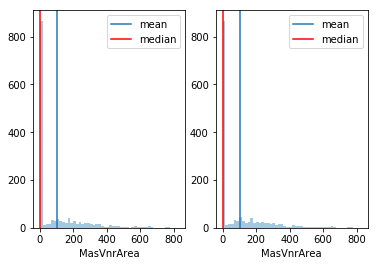

In [29]:
hist_before_nan_to_mean(train_df.MasVnrArea)

In [30]:
train_df.MasVnrArea = train_df.MasVnrArea.fillna(train_df.MasVnrArea.mean())

In [31]:
train_df.MasVnrType = train_df.MasVnrType.fillna(train_df.MasVnrType.mode()[0])

### Exploratory Data Analysis

#### Distribution of `SalePrice` by Feature 
The following plots show the distribution of `SalePrice` by feature. For example, the first plot is for `MSZoning`. The green plot shows the distribution of `SalePrice` filtered for rows where `MSZoning` = `C(all)`. The green vertical line shows the mean `SalePrice` of that subset. The means are spread out implying that `MSZoning` is related to `SalePrice`.

In [32]:
one_ext = train_df[train_df.Exterior1st == train_df.Exterior2nd].drop(columns = 'Exterior2nd')
two_ext = train_df[train_df.Exterior1st != train_df.Exterior2nd]

c0 = one_ext[['Exterior1st', 'SalePrice']].rename(columns = {'Exterior1st' : 'Exterior'})
c1 = two_ext[['Exterior1st', 'SalePrice']].rename(columns = {'Exterior1st' : 'Exterior'})
c2 = two_ext[['Exterior2nd', 'SalePrice']].rename(columns = {'Exterior2nd' : 'Exterior'})
data_to_plot = pd.concat([c0, c1, c2], axis = 'rows').reset_index()

def count_box_plots(categories):
    for category in categories:
        if not (category.startswith('Exterior') or category.startswith('Condition')):
            data_to_plot = train_df
        
        elif category == 'Exterior1st':
            one_ext = train_df[train_df.Exterior1st == train_df.Exterior2nd].drop(columns = 'Exterior2nd')
            two_ext = train_df[train_df.Exterior1st != train_df.Exterior2nd]
            
            c0 = one_ext[['Exterior1st', 'SalePrice']].rename(columns = {'Exterior1st' : 'Exterior'})
            c1 = two_ext[['Exterior1st', 'SalePrice']].rename(columns = {'Exterior1st' : 'Exterior'})
            c2 = two_ext[['Exterior2nd', 'SalePrice']].rename(columns = {'Exterior2nd' : 'Exterior'})
            data_to_plot = pd.concat([c0, c1, c2], axis = 'rows').reset_index()
            category = 'Exterior'
            
        elif category == 'Condition1':
            one_cond = train_df[train_df.Condition1 == train_df.Condition2].drop(columns = 'Condition2')
            two_cond = train_df[train_df.Condition1 != train_df.Condition2]
            
            c0 = one_cond[['Condition1', 'SalePrice']].rename(columns = {'Condition1': 'Condn'})
            c1 = two_cond[['Condition1', 'SalePrice']].rename(columns = {'Condition1': 'Condn'})
            c2 = two_cond[['Condition2', 'SalePrice']].rename(columns = {'Condition2': 'Condn'})
            data_to_plot = pd.concat([c0, c1, c2], axis = 'rows').reset_index()
            category = 'Condn'
        
        elif category == 'Exterior2nd' or category == 'Condition2':
            continue

        print(category)

        values = data_to_plot[category].drop_duplicates()
        if len(values) > 6:
            f, (ax1, ax2) = plt.subplots(2,1, figsize = (12, 6))
        else:
            f, (ax1, ax2) = plt.subplots(1,2, figsize = (14, 3))
            
        sns.countplot(x = data_to_plot[category].sort_values(), 
                      ax=ax1)        
        xt = plt.xticks(rotation=45)
        sns.boxplot(x = data_to_plot[category].sort_values(), 
                    y = data_to_plot['SalePrice'],  
                    ax=ax2)
        xt = plt.xticks(rotation=45)        
        plt.show()

MSSubClass


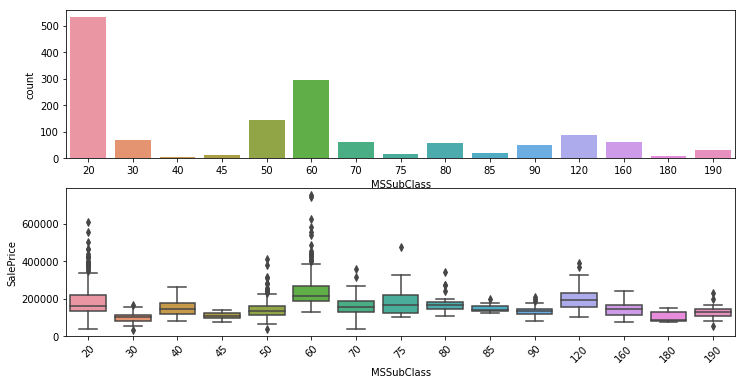

MSZoning


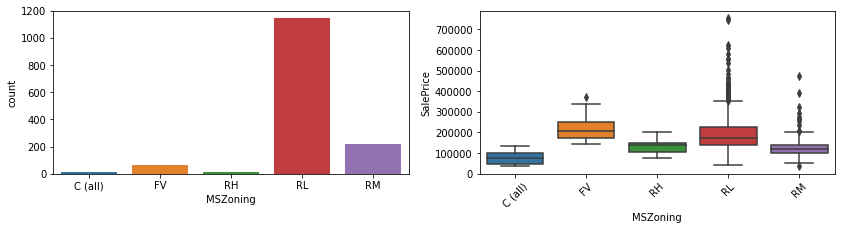

Street


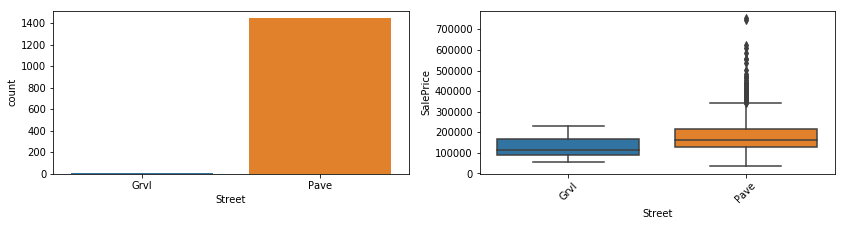

Alley


LotShape


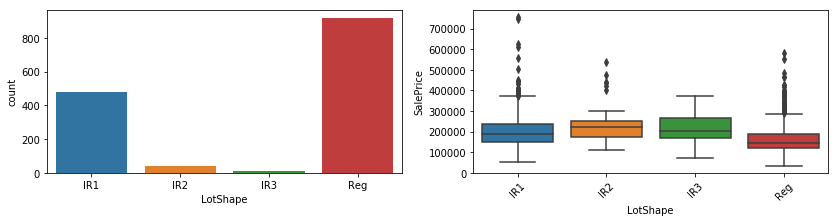

LandContour


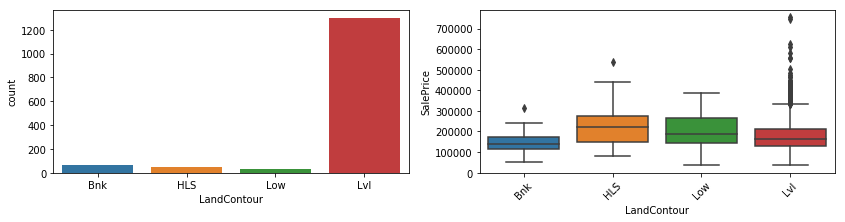

Utilities


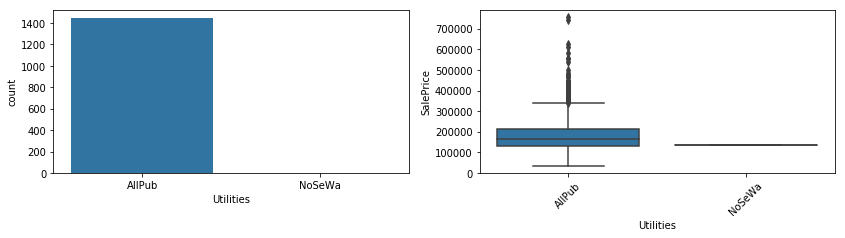

LotConfig


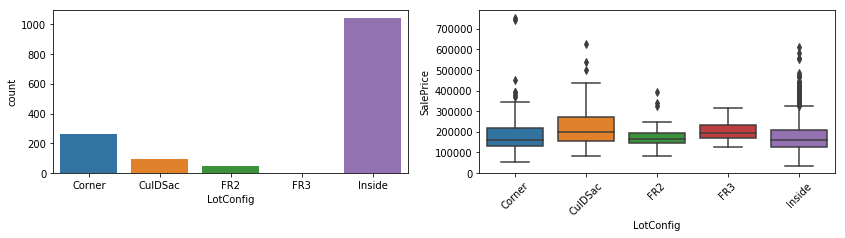

LandSlope


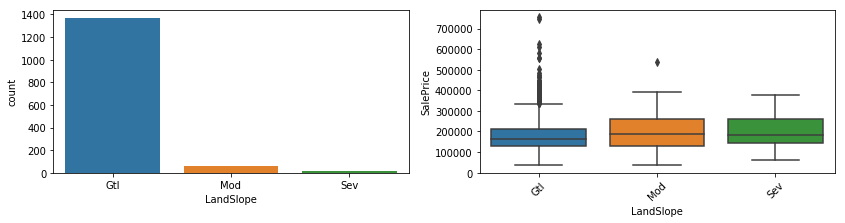

Neighborhood


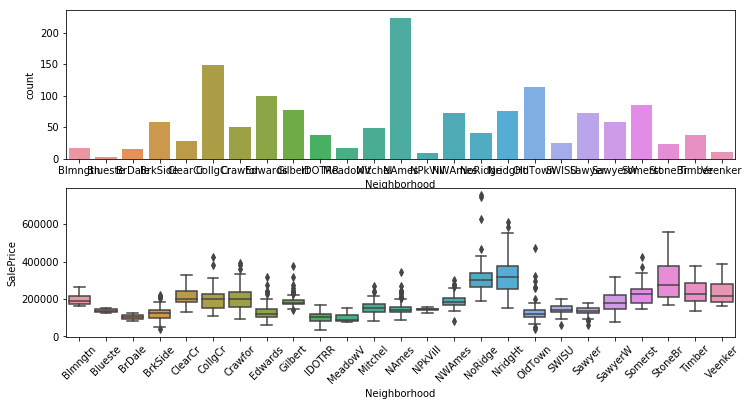

Condn


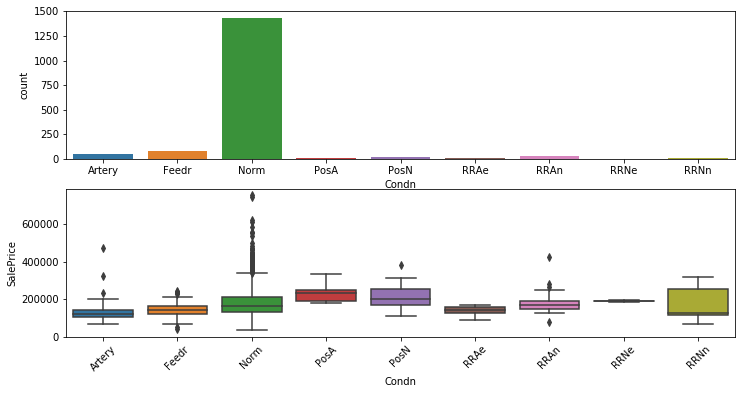

BldgType


HouseStyle


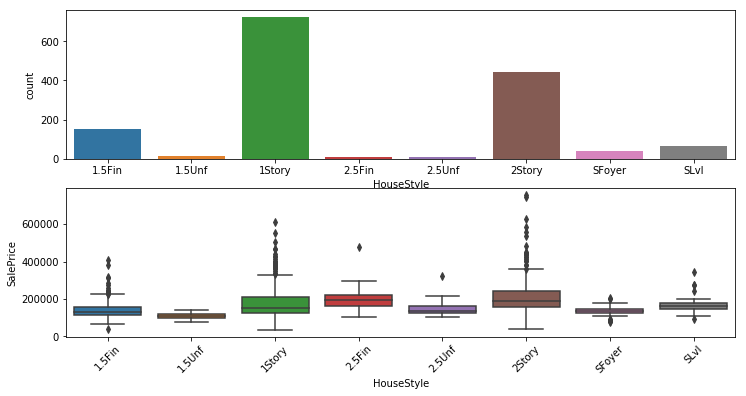

OverallQual


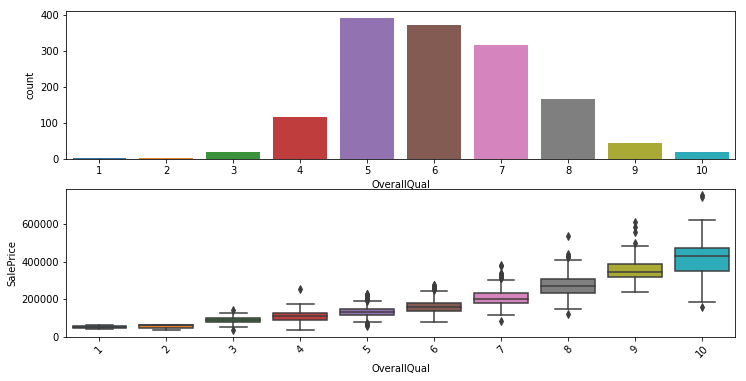

OverallCond


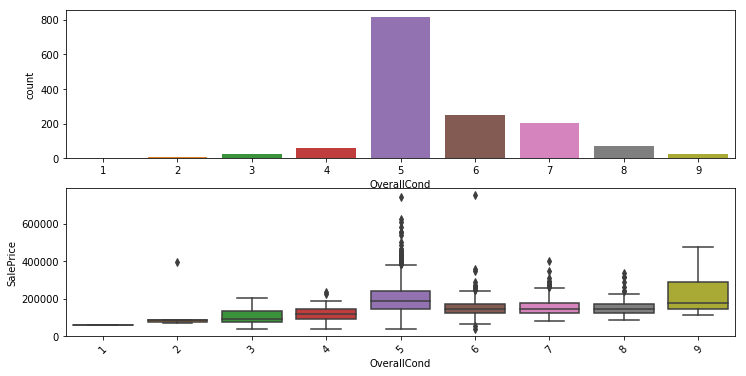

RoofStyle


RoofMatl


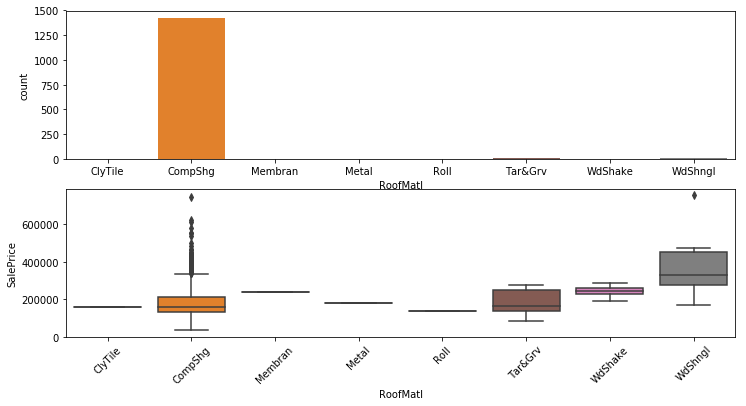

Exterior


MasVnrType


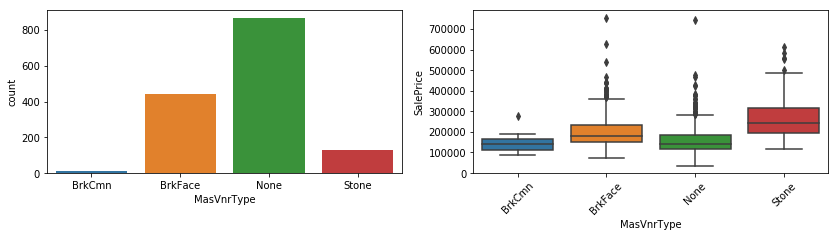

ExterQual


ExterCond


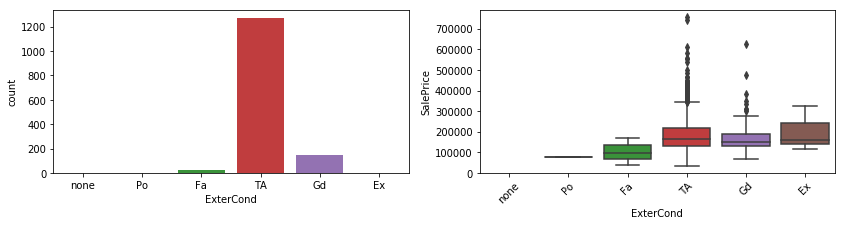

Foundation


BsmtQual


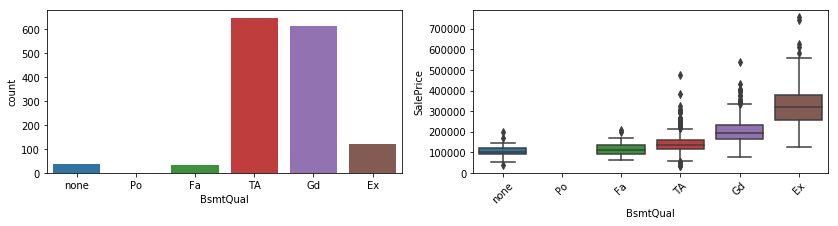

BsmtCond


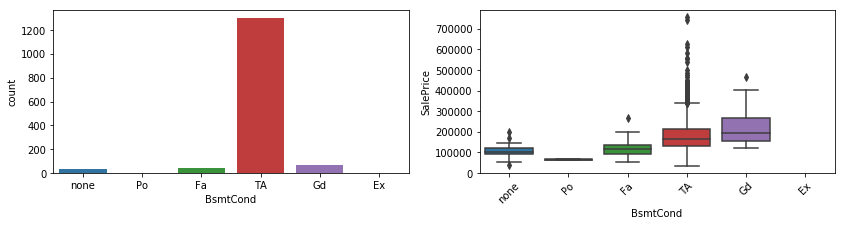

BsmtExposure


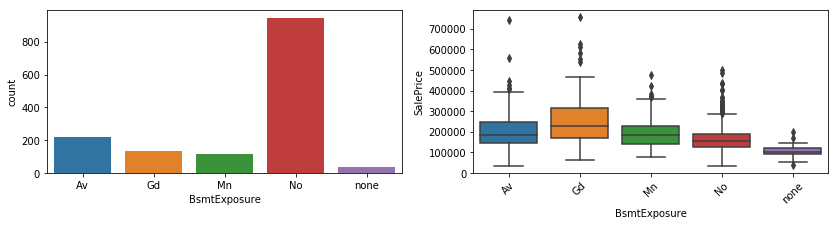

BsmtFinType1


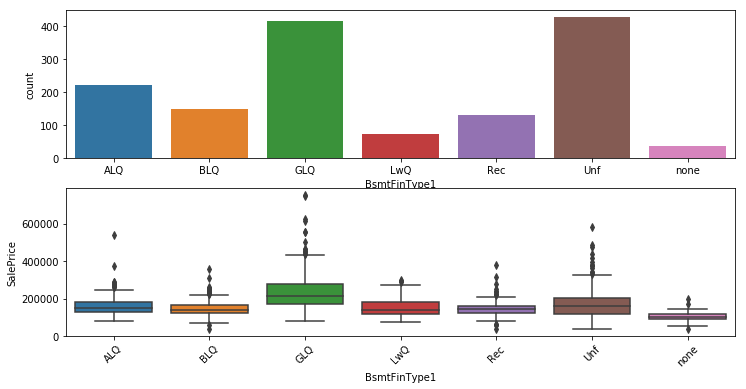

BsmtFinType2


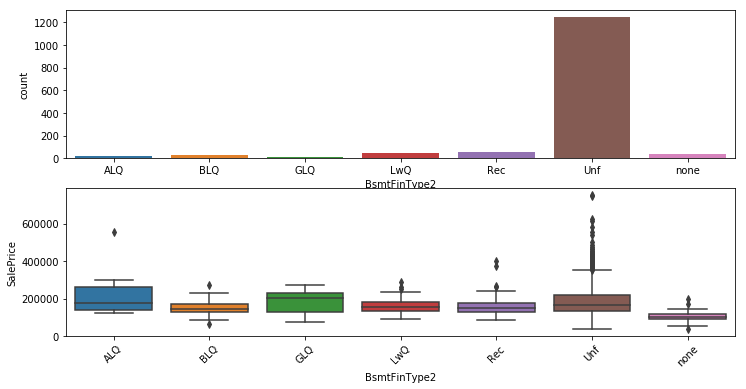

Heating


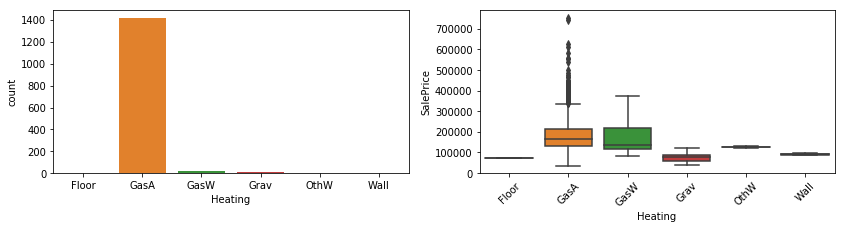

HeatingQC


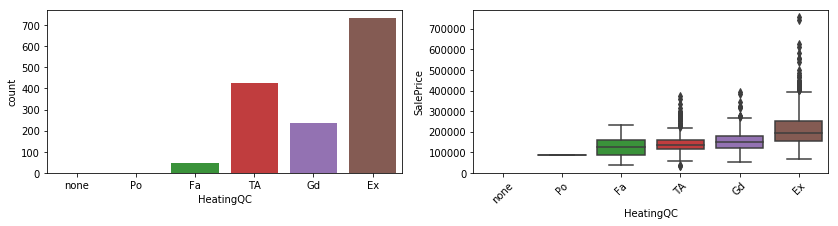

CentralAir


Electrical


FullBath


HalfBath


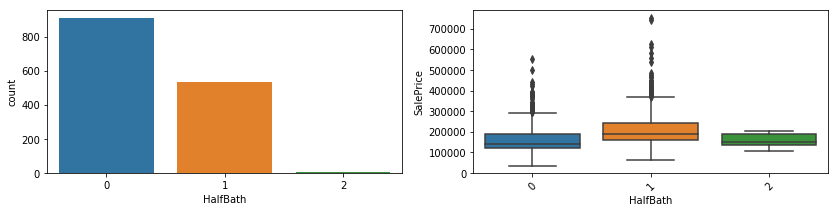

BedroomAbvGr


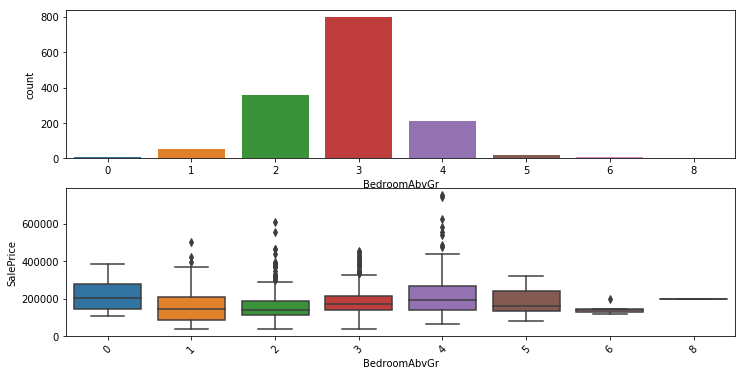

KitchenAbvGr


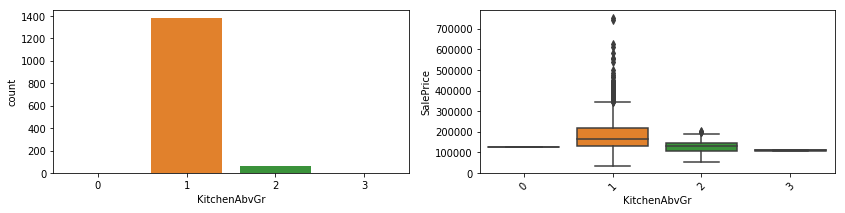

KitchenQual


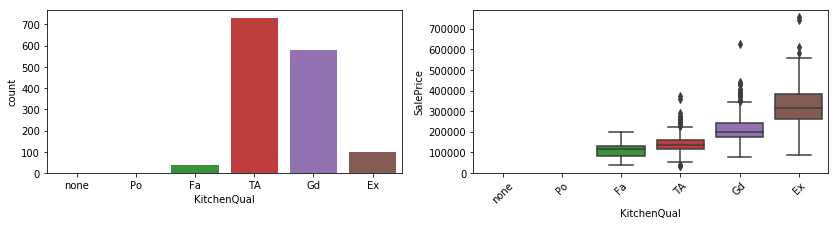

TotRmsAbvGrd


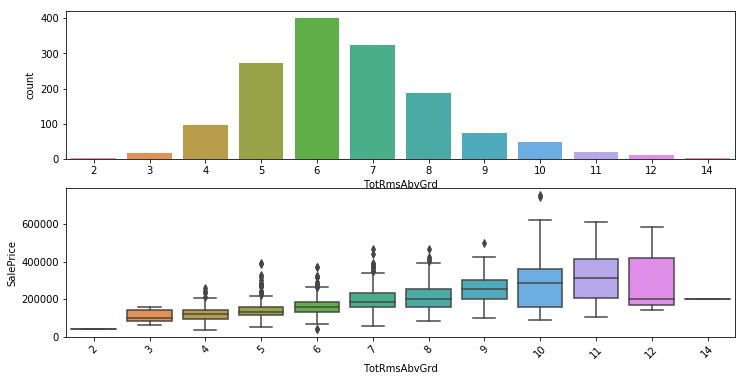

Functional


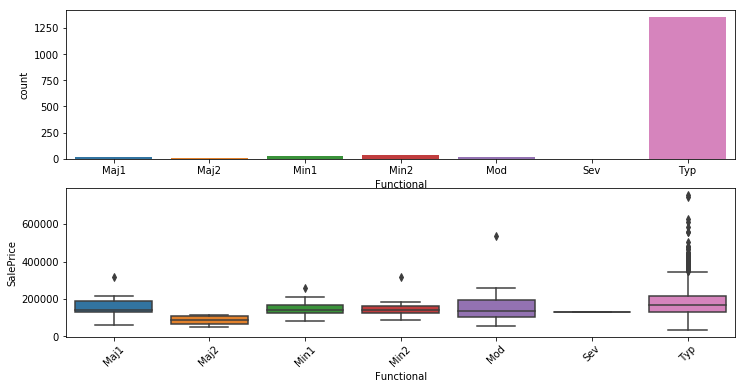

Fireplaces


FireplaceQu


GarageType


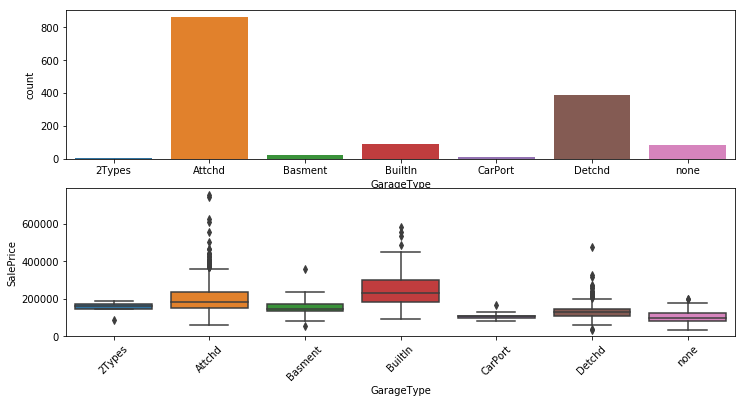

GarageFinish


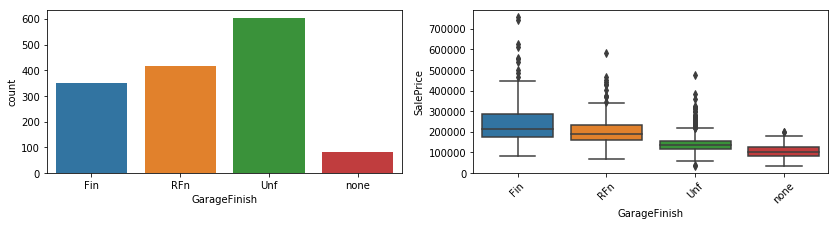

GarageQual


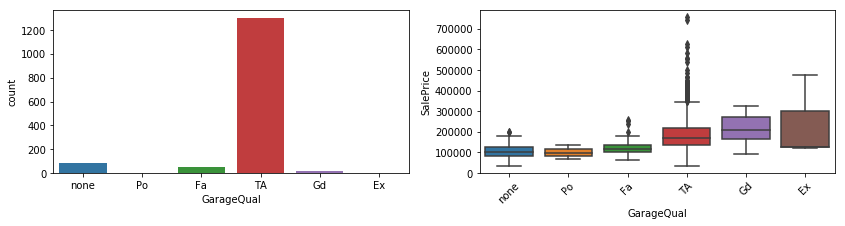

GarageCond


PavedDrive


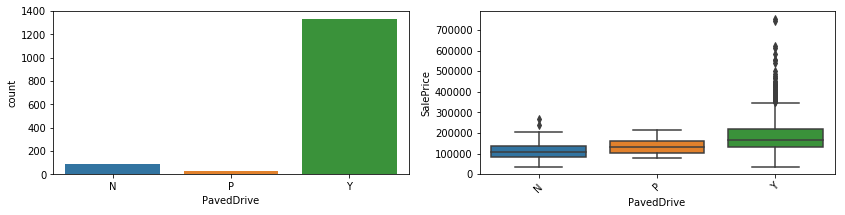

PoolQC


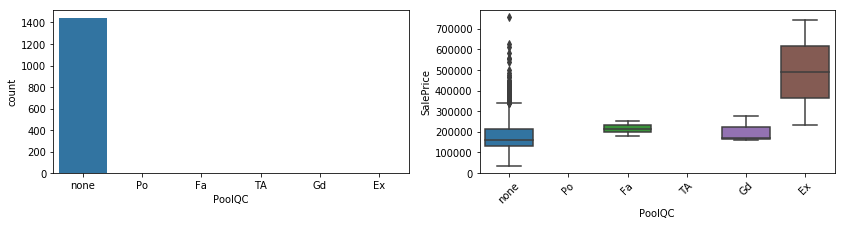

Fence


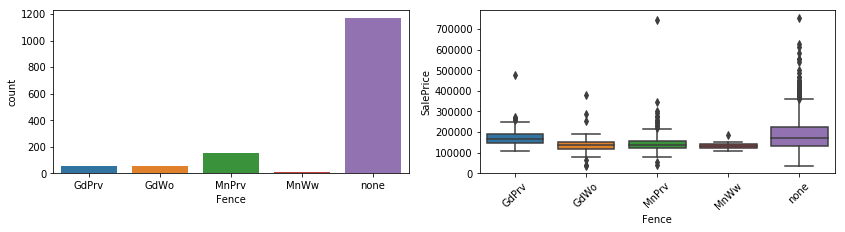

MiscFeature


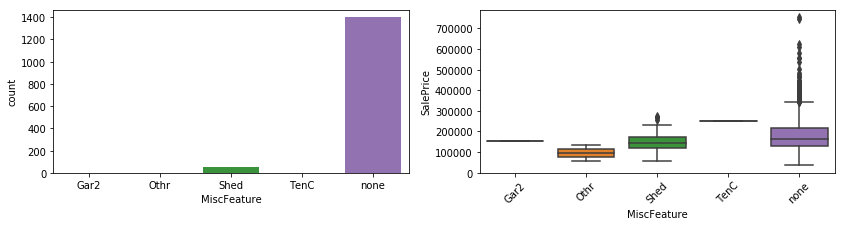

MoSold


SaleType


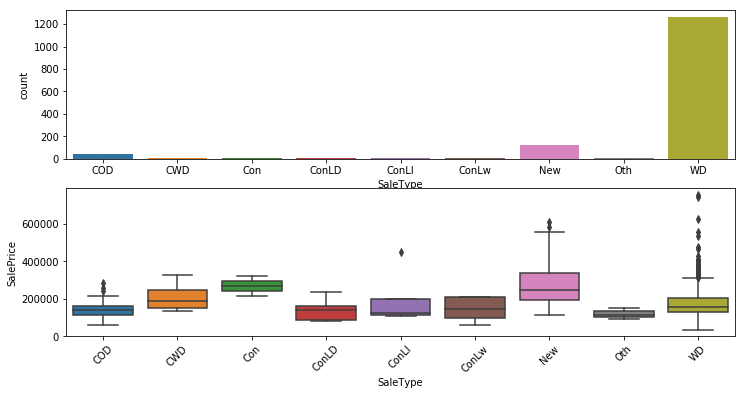

SaleCondition


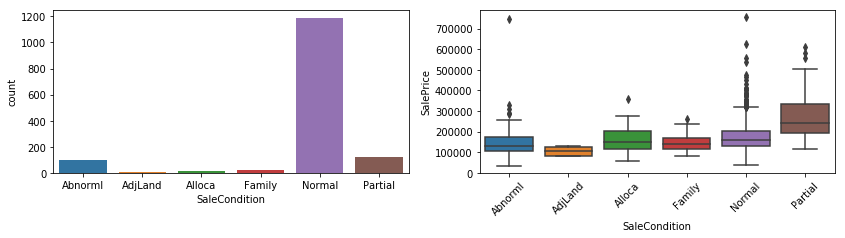

bin_YearBuilt


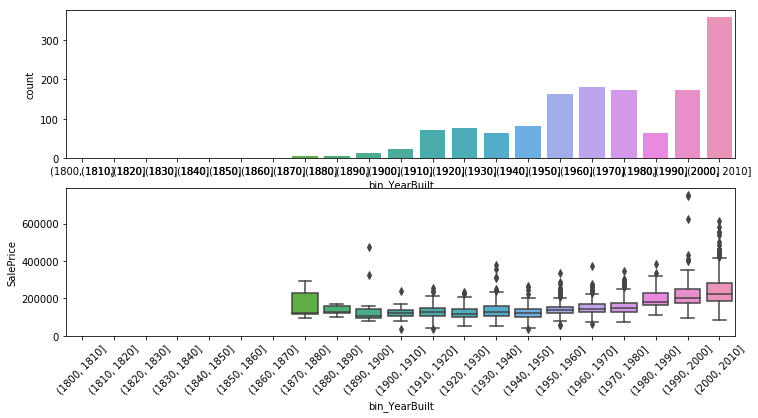

bin_YearRemodAdd


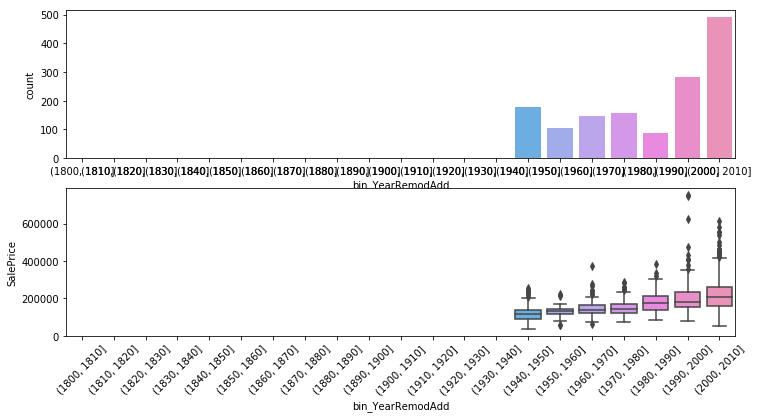

bin_GarageYrBlt


In [33]:
cat_df = train_df.drop(columns = num_feats)
count_box_plots(cat_df.columns.values)

In [34]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(train_df[num_feats].corr(), center=0, cmap = plt.get_cmap('PiYG'))

### `X`: Columns That Can Be Fitted to Predictive Models

In [44]:
X = train_df.drop(columns=cols_to_not_fit + ['SalePrice'])

### Pickling

#### Why not store dataframe and functions to pass to other notebooks?
We can store dataframes by running `%store train_df` and grab it in another notebook by running `%store -r train_df`. However, you need to always run this notebook first, where we store `train_df`. When we pickle, we do not need to rerun the notebook where we store `train_df`.  

Also, we cannot store functions. 

Pickling makes more sense.

In [42]:
train_df.to_pickle('../data/train_df.p')

In [45]:
pickle.dump(X, 
            open('../data/X.p', 'wb'))